In [1]:
import numpy as np
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import seaborn as sns
import IPython
import IPython.display as ipd
from scipy.io import wavfile
import glob
import os
import json
import shutil

# 各種設定
pd.options.display.max_columns=None
%matplotlib inline

In [2]:
# confirm the number of filess

audio_path = "./train/audio/"
view1_path = "./train/view1/rgb/"
view2_path = "./train/view2/rgb/"
view3_path = "./train/view3/rgb/"
view4_path = "./train/view4/rgb/"

# audio
print("audio ; ", sum(os.path.isfile(os.path.join(audio_path,name)) for name in os.listdir(audio_path)))

# view 
print("view1 ; ", sum(os.path.isfile(os.path.join(view1_path,name)) for name in os.listdir(view1_path)))
print("view2 ; ", sum(os.path.isfile(os.path.join(view2_path,name)) for name in os.listdir(view2_path)))
print("view3 ; ", sum(os.path.isfile(os.path.join(view3_path,name)) for name in os.listdir(view3_path)))
print("view4 ; ", sum(os.path.isfile(os.path.join(view4_path,name)) for name in os.listdir(view4_path)))



audio ;  683
view1 ;  684
view2 ;  684
view3 ;  684
view4 ;  684


# 注釈ファイル(jsonファイル)の読み込み

In [3]:
open_file = open("annotation.json")

# jsonファイルとして読み込む
annotation_json = json.load(open_file)
# 正しく読み込めているか確認
print (len(annotation_json["annotations"]))

684


In [4]:
# 最初の10このデータの確認
for i in range(10):
    print('*'*25, 'data{}'.format(i), '*'*25)
    print(annotation_json['annotations'][i])
    print()

************************* data0 *************************
{'id': 0, 'container id': 2, 'scenario': 2, 'background': 1, 'illumination': 0, 'width at the top': 69.0, 'width at the bottom': 42.0, 'height': 72.0, 'depth': -1.0, 'container capacity': 185.0, 'container mass': 2.0, 'filling type': 2, 'filling level': 1, 'filling density': 0.82, 'filling mass': 76.0, 'object mass': 78.0, 'handover starting frame': -1, 'handover start timestamp': -1, 'handover hand': -1}

************************* data1 *************************
{'id': 1, 'container id': 7, 'scenario': 0, 'background': 0, 'illumination': 0, 'width at the top': 193.0, 'width at the bottom': 193.0, 'height': 241.0, 'depth': 69.0, 'container capacity': 3209.397, 'container mass': 59.0, 'filling type': 0, 'filling level': 0, 'filling density': 0.0, 'filling mass': 0.0, 'object mass': 59.0, 'handover starting frame': -1, 'handover start timestamp': -1, 'handover hand': -1}

************************* data2 *************************
{

# pandasを使ってjsonファイルを読み込む

In [5]:
df = pd.DataFrame(annotation_json["annotations"])
df.head()

,id,container id,scenario,background,illumination,width at the top,width at the bottom,height,depth,container capacity,container mass,filling type,filling level,filling density,filling mass,object mass,handover starting frame,handover start timestamp,handover hand
0,0,2,2,1,0,69.0,42.0,72.0,-1.0,185.000,2.0,2,1,0.82,76.0,78.0,-1,-1,-1
1,1,7,0,0,0,193.0,193.0,241.0,69.0,3209.397,59.0,0,0,0.00,0.0,59.0,-1,-1,-1
2,2,2,0,1,0,69.0,42.0,72.0,-1.0,185.000,2.0,3,1,1.00,93.0,95.0,-1,-1,-1
3,3,8,0,1,0,135.0,135.0,164.0,56.0,1239.840,31.0,0,0,0.00,0.0,31.0,-1,-1,-1
4,4,4,1,1,0,88.0,56.0,91.0,-1.0,296.000,86.0,1,1,0.34,45.0,131.0,-1,-1,-1


In [7]:
folder = "./train/audio/"
files = glob.glob(folder+"*.wav")

files_view1 = sorted(glob.glob("./train/view1/rgb/*.mp4"))
files_view2 = sorted(glob.glob("./train/view2/rgb/*.mp4"))
files_view3 = sorted(glob.glob("./train/view3/rgb/*.mp4"))
files_view4 = sorted(glob.glob("./train/view4/rgb/*.mp4"))

files = sorted(files)

df["audio_file"] = files
df["rgb_view1"] = files_view1
df["rgb_view2"] = files_view2
df["rgb_view3"] = files_view3
df["rgb_view4"] = files_view4

df = df.drop(index=337)
print(df.shape)
df.head()

(683, 24)


,id,container id,scenario,background,illumination,width at the top,width at the bottom,height,depth,container capacity,container mass,filling type,filling level,filling density,filling mass,object mass,handover starting frame,handover start timestamp,handover hand,audio_file,rgb_view1,rgb_view2,rgb_view3,rgb_view4
0,0,2,2,1,0,69.0,42.0,72.0,-1.0,185.000,2.0,2,1,0.82,76.0,78.0,-1,-1,-1,./train/audio/000000.wav,./train/view1/rgb/000000.mp4,./train/view2/rgb/000000.mp4,./train/view3/rgb/000000.mp4,./train/view4/rgb/000000.mp4
1,1,7,0,0,0,193.0,193.0,241.0,69.0,3209.397,59.0,0,0,0.00,0.0,59.0,-1,-1,-1,./train/audio/000001.wav,./train/view1/rgb/000001.mp4,./train/view2/rgb/000001.mp4,./train/view3/rgb/000001.mp4,./train/view4/rgb/000001.mp4
2,2,2,0,1,0,69.0,42.0,72.0,-1.0,185.000,2.0,3,1,1.00,93.0,95.0,-1,-1,-1,./train/audio/000002.wav,./train/view1/rgb/000002.mp4,./train/view2/rgb/000002.mp4,./train/view3/rgb/000002.mp4,./train/view4/rgb/000002.mp4
3,3,8,0,1,0,135.0,135.0,164.0,56.0,1239.840,31.0,0,0,0.00,0.0,31.0,-1,-1,-1,./train/audio/000003.wav,./train/view1/rgb/000003.mp4,./train/view2/rgb/000003.mp4,./train/view3/rgb/000003.mp4,./train/view4/rgb/000003.mp4
4,4,4,1,1,0,88.0,56.0,91.0,-1.0,296.000,86.0,1,1,0.34,45.0,131.0,-1,-1,-1,./train/audio/000004.wav,./train/view1/rgb/000004.mp4,./train/view2/rgb/000004.mp4,./train/view3/rgb/000004.mp4,./train/view4/rgb/000004.mp4


In [8]:
audio_files = df['audio_file']
for i in range (5):
    print(audio_files[i])
    audio_sample, _ = librosa.core.load(audio_files[i], sr=44100)
    IPython.display.display(ipd.Audio(data=audio_sample, rate=44100))

./train/audio/000000.wav


./train/audio/000001.wav


./train/audio/000002.wav


./train/audio/000003.wav


./train/audio/000004.wav


In [9]:
df = df.sort_values("container id")

# 列名 の変更
columns = ["id", "container_id", "scenario", "background", "illumination", "width_at_the_top", "width_at_the_bottom", \
    "height", "depth", "container_capacity", "container_mass", "filling_type", "filling_level", "filling_density", "filling_mass", \
        "object_mass", "handover_starting_frame", "handover_start_timestamp", "handover_hand", "audio_file", \
            "rgb_view1", "rgb_view2", "rgb_view3", "rgb_view4"]
df.columns = columns
print(df.shape)
df.head()

(683, 24)


,id,container_id,scenario,background,illumination,width_at_the_top,width_at_the_bottom,height,depth,container_capacity,container_mass,filling_type,filling_level,filling_density,filling_mass,object_mass,handover_starting_frame,handover_start_timestamp,handover_hand,audio_file,rgb_view1,rgb_view2,rgb_view3,rgb_view4
220,220,1,2,0,1,98.0,61.0,119.0,-1.0,520.0,10.0,0,0,0.00,0.0,10.0,-1,-1,-1,./train/audio/000220.wav,./train/view1/rgb/000220.mp4,./train/view2/rgb/000220.mp4,./train/view3/rgb/000220.mp4,./train/view4/rgb/000220.mp4
152,152,1,0,0,1,98.0,61.0,119.0,-1.0,520.0,10.0,2,2,0.82,399.0,409.0,-1,-1,-1,./train/audio/000152.wav,./train/view1/rgb/000152.mp4,./train/view2/rgb/000152.mp4,./train/view3/rgb/000152.mp4,./train/view4/rgb/000152.mp4
317,317,1,0,1,0,98.0,61.0,119.0,-1.0,520.0,10.0,1,2,0.34,195.0,205.0,-1,-1,-1,./train/audio/000317.wav,./train/view1/rgb/000317.mp4,./train/view2/rgb/000317.mp4,./train/view3/rgb/000317.mp4,./train/view4/rgb/000317.mp4
313,313,1,1,0,0,98.0,61.0,119.0,-1.0,520.0,10.0,3,2,1.00,468.0,478.0,-1,-1,-1,./train/audio/000313.wav,./train/view1/rgb/000313.mp4,./train/view2/rgb/000313.mp4,./train/view3/rgb/000313.mp4,./train/view4/rgb/000313.mp4
78,78,1,0,1,0,98.0,61.0,119.0,-1.0,520.0,10.0,1,1,0.34,109.0,119.0,-1,-1,-1,./train/audio/000078.wav,./train/view1/rgb/000078.mp4,./train/view2/rgb/000078.mp4,./train/view3/rgb/000078.mp4,./train/view4/rgb/000078.mp4


# filling type のデータの個数の可視化
> id=0 : none  
> id=1 : pasta  
> id=2 : rice  
> id=3 : water

<AxesSubplot:title={'center':'Count by filling_type'}>

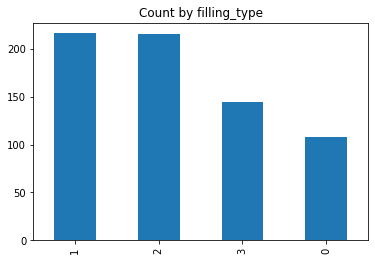

In [10]:
plt.title('Count by filling_type')
df['filling_type'].value_counts().plot.bar()

# filling_levelごとのデータの個数の可視化
> id=0 : empty(0%)  
> id=1 : half-full(50%)  
> id=2 : full(90%)

Text(0.5, 1.0, 'Count by filling_level')

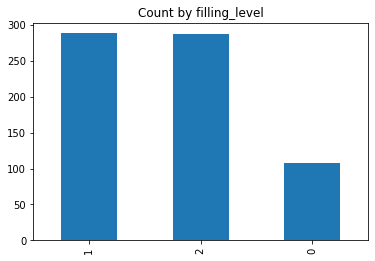

In [11]:
df['filling_level'].value_counts().plot.bar()
plt.title('Count by filling_level')

In [12]:
"""
columns = ["folder_num", "num", "file_name", "subject", "filling_type", "filling_level", "back", "light", \
    "start", "end"]
df_csv = pd.DataFrame(index=None, columns=columns)

row_temp = {"folder_num":[], "num":[], "file_name":[], "subject":[], "filling_type":[],
                "filling_level":[], "back":[], "light":[], "start":[], "end":[]}

# folder_numの設定
for i in range(1, 10):
    count = 0

    for df_fol in df[df["container_id"] == i].itertuples():
        fname = f"s{df_fol.scenario}_fi{df_fol.filling_type}_fu{df_fol.filling_level}" + \
                f"_b{df_fol.background}_l{df_fol.illumination}_c2"
        row_temp["folder_num"].append(i),
        row_temp["num"].append(count),
        row_temp["file_name"].append(fname),
        row_temp["subject"].append(df_fol.scenario),
        row_temp["filling_type"].append(df_fol.filling_type),
        row_temp["filling_level"].append(df_fol.filling_level),
        row_temp["back"].append(df_fol.background),
        row_temp["light"].append(df_fol.illumination),
        row_temp["start"].append(df_fol.handover_start_timestamp),
        row_temp["end"].append(-1)

        count += 1

df_csv = pd.concat([df_csv, pd.DataFrame.from_dict(row_temp)])

print(df_csv.shape)
df_csv.head()
"""

'\ncolumns = ["folder_num", "num", "file_name", "subject", "filling_type", "filling_level", "back", "light",     "start", "end"]\ndf_csv = pd.DataFrame(index=None, columns=columns)\n\nrow_temp = {"folder_num":[], "num":[], "file_name":[], "subject":[], "filling_type":[],\n                "filling_level":[], "back":[], "light":[], "start":[], "end":[]}\n\n# folder_numの設定\nfor i in range(1, 10):\n    count = 0\n\n    for df_fol in df[df["container_id"] == i].itertuples():\n        fname = f"s{df_fol.scenario}_fi{df_fol.filling_type}_fu{df_fol.filling_level}" +                 f"_b{df_fol.background}_l{df_fol.illumination}_c2"\n        row_temp["folder_num"].append(i),\n        row_temp["num"].append(count),\n        row_temp["file_name"].append(fname),\n        row_temp["subject"].append(df_fol.scenario),\n        row_temp["filling_type"].append(df_fol.filling_type),\n        row_temp["filling_level"].append(df_fol.filling_level),\n        row_temp["back"].append(df_fol.background),\n   

In [13]:
# 移動前のフォルダのpath
DIR_BEFORE = "./train/"
# 移動後のファイルpath
DIR_AFTER = "./data/"

# 音声ファイルをフォルダへ移す
# フォルダの作成
for i in range(1, 10):
    os.makedirs("./data/{}/".format(i), exist_ok=True)
    os.makedirs(f"./data/{i}/audio", exist_ok=True)
    os.makedirs(f"./data/{i}/view1/rgb/", exist_ok=True)
    os.makedirs(f"./data/{i}/view2/rgb/", exist_ok=True)
    os.makedirs(f"./data/{i}/view3/rgb/", exist_ok=True)
    os.makedirs(f"./data/{i}/view4/rgb/", exist_ok=True)

# 1行ずつ処理
for i in range(df.shape[0]):
    row = df.iloc[i, :]
    # 各ファイルの移動前のpath
    audio_b = row["audio_file"]
    view1_b = row["rgb_view1"]
    view2_b = row["rgb_view2"]
    view3_b = row["rgb_view3"]
    view4_b = row["rgb_view4"]

    # 音声ファイルの名前の変更 
    s = row["scenario"]
    fi = row["filling_type"]
    fu = row["filling_level"]
    b = row["background"]
    l = row["illumination"]
    c = 2
    # audio_af = f"s{s}_fi{fi}_fu{fu}_b{b}_l{l}_c{c}_audio.wav"
    audio_af = f"s{s}_fi{fi}_fu{fu}_b{b}_l{l}_audio.wav"
    os.rename(audio_b, DIR_BEFORE+"audio/"+audio_af)
    
    # # 移動後のファイル名
    # view1_af = row["rgb_view1"].split("/")[-1]
    # view2_af = row["rgb_view2"].split("/")[-1]
    # view3_af = row["rgb_view3"].split("/")[-1]
    # view4_af = row["rgb_view4"].split("/")[-1]
    
    # 移動後のファイルpath
    audio_bf = DIR_BEFORE + "audio/" + audio_af
    after_dir = DIR_AFTER+str(row["container_id"])+"/"

    # 各ファイルを移動
    shutil.move(audio_bf, after_dir+"audio/")
    shutil.move(view1_b, after_dir+"view1/rgb/")
    shutil.move(view2_b, after_dir+"view2/rgb/")
    shutil.move(view3_b, after_dir+"view3/rgb/")
    shutil.move(view4_b, after_dir+"view4/rgb/")

In [16]:
columns = ["folder_num", "num", "file_name", "subject", "filling_type", "filling_level", "back", "light", \
    "camera_id", "start", "end"]
df_csv = pd.DataFrame(index=None, columns=columns)

row_temp = {"folder_num":[], "num":[], "file_name":[], "subject":[], "filling_type":[],
                "filling_level":[], "back":[], "light":[], "camera_id":[], "start":[], "end":[]}

# folder_numの設定
for i in range(1, 10):
    count = 0

    for df_fol in df[df["container_id"] == i].itertuples():
        fname = f"s{df_fol.scenario}_fi{df_fol.filling_type}_fu{df_fol.filling_level}" + \
                f"_b{df_fol.background}_l{df_fol.illumination}_c2"
        row_temp["folder_num"].append(i)
        row_temp["num"].append(count)
        row_temp["file_name"].append(fname)
        row_temp["subject"].append(df_fol.scenario)
        row_temp["filling_type"].append(df_fol.filling_type)
        row_temp["filling_level"].append(df_fol.filling_level)
        row_temp["back"].append(df_fol.background)
        row_temp["camera_id"].append(2)
        row_temp["light"].append(df_fol.illumination)
        row_temp["start"].append(df_fol.handover_start_timestamp)
        row_temp["end"].append(-1)

        count += 1

df_csv = pd.concat([df_csv, pd.DataFrame.from_dict(row_temp)])

print(df_csv.shape)
df_csv.head()

(683, 11)


,folder_num,num,file_name,subject,filling_type,filling_level,back,light,camera_id,start,end
0,1,0,s2_fi0_fu0_b0_l1_c2,2,0,0,0,1,2,-1,-1
1,1,1,s0_fi2_fu2_b0_l1_c2,0,2,2,0,1,2,-1,-1
2,1,2,s0_fi1_fu2_b1_l0_c2,0,1,2,1,0,2,-1,-1
3,1,3,s1_fi3_fu2_b0_l0_c2,1,3,2,0,0,2,-1,-1
4,1,4,s0_fi1_fu1_b1_l0_c2,0,1,1,1,0,2,-1,-1


In [17]:
# save csv file
df_csv.to_csv("annotations.csv", index=False)

In [18]:
df["container_id"].value_counts()

1    84
2    84
3    84
4    84
5    84
6    84
7    60
9    60
8    59
Name: container_id, dtype: int64

In [19]:
df_csv["folder_num"].value_counts()

1    84
2    84
3    84
4    84
5    84
6    84
7    60
9    60
8    59
Name: folder_num, dtype: int64

In [ ]:
"""
# 移動前のフォルダのpath
DIR_BEFORE = "./train/"
# 移動後のファイルpath
DIR_AFTER = "./data/"

# 音声ファイルをフォルダへ移す
# フォルダの作成
for i in range(1, 10):
    os.makedirs("./data/{}/".format(i), exist_ok=True)
    os.makedirs(f"./data/{i}/audio", exist_ok=True)
    os.makedirs(f"./data/{i}/view1/rgb/", exist_ok=True)
    os.makedirs(f"./data/{i}/view2/rgb/", exist_ok=True)
    os.makedirs(f"./data/{i}/view3/rgb/", exist_ok=True)
    os.makedirs(f"./data/{i}/view4/rgb/", exist_ok=True)

# 1行ずつ処理
for i in range(df.shape[0]):
    row = df.iloc[i, :]
    # 各ファイルの移動前のpath
    audio_b = row["audio_file"]
    view1_b = row["rgb_view1"]
    view2_b = row["rgb_view2"]
    view3_b = row["rgb_view3"]
    view4_b = row["rgb_view4"]

    # 音声ファイルの名前の変更 
    s = row["scenario"]
    fi = row["filling_type"]
    fu = row["filling_level"]
    b = row["background"]
    l = row["illumination"]
    c = 2
    # audio_af = f"s{s}_fi{fi}_fu{fu}_b{b}_l{l}_c{c}_audio.wav"
    audio_af = f"s{s}_fi{fi}_fu{fu}_b{b}_l{l}_audio.wav"
    os.rename(audio_b, DIR_BEFORE+"audio/"+audio_af)
"""